## E-Commerce Project: Product Analysis

In [1]:
# import libraries for data mining
import numpy as np
import pandas as pd
# import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("e-commerce-data.csv")

### Descriptive Analysis

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data Preprocessing

In [5]:
# check duplicated rows
df.duplicated().sum()
df = df.drop_duplicates()

In [6]:
df.shape

(536641, 8)

In [7]:
# check missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [8]:
custid_mean = df["CustomerID"].mean()
df["CustomerID"] = df["CustomerID"].fillna(custid_mean)
df["Description"] = df["Description"].fillna("Empty Description")

In [9]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

### Feature Engineering

Features that needed to be engineered and redefined are: 
+ InvoiceDate
+ Quantity
+ UnitPrice

In [10]:
df["InvoiceDate"]

0         12/01/2010 08:26
1         12/01/2010 08:26
2         12/01/2010 08:26
3         12/01/2010 08:26
4         12/01/2010 08:26
                ...       
541904    12/09/2011 12:50
541905    12/09/2011 12:50
541906    12/09/2011 12:50
541907    12/09/2011 12:50
541908    12/09/2011 12:50
Name: InvoiceDate, Length: 536641, dtype: object

In [11]:
# split invoiceDate into InvoiceDate and InvoiceTime
df["Date"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["Date"] = pd.to_datetime(df["Date"])
df["InvoiceTime"] = pd.to_datetime(df["InvoiceDate"]).dt.time
df = df.drop(columns=["InvoiceDate","InvoiceTime"])

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01


In [13]:
# calculate total price 
df["Total_Price"] = df["Quantity"]*df["UnitPrice"]

### Data Analysis Process

Purpose of this process: Studying the historical data

1. Data Preprocessing
2. Correlation Analysis
3. Feature Engineering
4. Time Series Analysis
5. Exploratory Data Analysis + Hypothetical Questions

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,20.34


Questions: 
+ (**CHECK**): How does the total price evolve in year 2011 from january till december?
+ (**CHECK**): How many products have been sold per year?                      
+ Which month in the year of 2010 has the highest sales? 
+ Which product are the most sold by customers? 
+ Which countries made the highest profit? 
+ How many products did each country sell globally?

HQ1: How does the total price evolve in year 2011 from january till december?

### Time Series Analysis

In [15]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["Month"] = pd.to_datetime(df["Date"]).dt.month

Products in 2011

In [16]:
retail11 = df[df["Year"] == 2011]
retail11.index = np.arange(0,494660)
retail11

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Total_Price,Year,Month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,13313.0,United Kingdom,2011-01-04,19.50,2011,1
1,539993,21499,BLUE POLKADOT WRAP,25,0.42,13313.0,United Kingdom,2011-01-04,10.50,2011,1
2,539993,21498,RED RETROSPOT WRAP,25,0.42,13313.0,United Kingdom,2011-01-04,10.50,2011,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2.10,13313.0,United Kingdom,2011-01-04,10.50,2011,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1.25,13313.0,United Kingdom,2011-01-04,12.50,2011,1
...,...,...,...,...,...,...,...,...,...,...,...
494655,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,10.20,2011,12
494656,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12.60,2011,12
494657,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,16.60,2011,12
494658,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,16.60,2011,12


Time series trend for year 2011

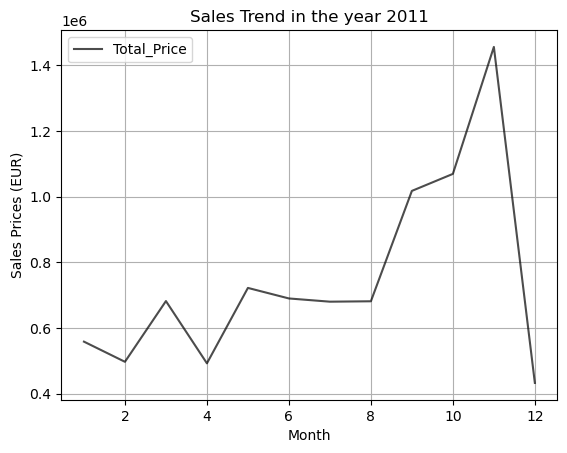

In [85]:
trend10_data = retail11[["Date","Year","Month","Total_Price"]]
trend10_data_gr = trend10_data.groupby("Month")[["Total_Price"]].sum().reset_index()


# visualise trend
trend10_data_gr.plot(kind="line", x="Month", y="Total_Price", color="black", alpha=0.7)

# add graph details
plt.xlabel("Month")
plt.ylabel("Sales Prices (EUR)")
plt.title("Sales Trend in the year 2011")

# display graph
plt.grid()
plt.show()

In [18]:
sales_data = trend10_data[["Month","Total_Price"]]
sales_gr = sales_data.groupby("Month")[["Total_Price"]].sum()
sale1 = sales_gr["Total_Price"].loc[10]
sale2 = sales_gr["Total_Price"].loc[12]
sale_diff = sale2 -sale1
print(f"Sale Difference between octobre and december: {sale_diff} EUR (loss)")

Sale Difference between octobre and december: -636667.1699999999 EUR (loss)


The sales trend in the year 2011 shows a clear fluctuations in sales of products sold through the year. 
Remarkably, the sales augements since april 2011 gradually. More and less, an exessive loss has occured in the sales of the company with amount of 63,6667 EUR. The cause of this loss need a thorough examination and a re-analysis of this observation

New Problems: 
+ Why is the there an extreme drop in sales from octobre till december? 
+ What are the factors for a gradual increase in sales from april till octobre? 

The dataset of e-commerce does not provide any metrics that are relevant to these following problems. To continue the analysis, more data is required which includes metrics that assist in identifying the main causes of these economical deficiencies.

HQ2: How many products have been sold per year? 

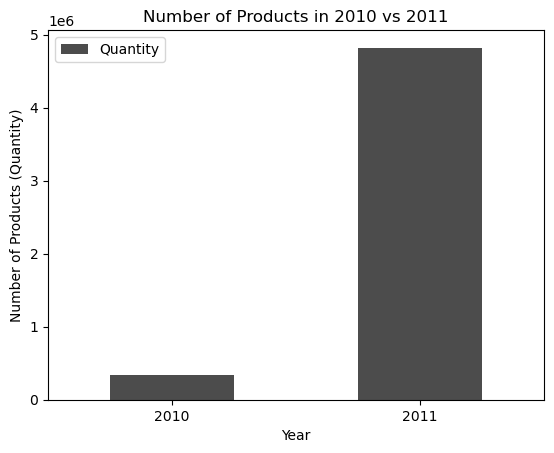

In [19]:
num_products_yr = df.groupby("Year")[["Quantity","Total_Price"]].sum().reset_index()
num_products_yr.plot(kind="bar", x="Year", y="Quantity", color="black", alpha=0.70)


# add graph details
plt.xlabel("Year")
plt.ylabel("Number of Products (Quantity)")
plt.xticks(rotation="horizontal")
plt.title("Number of Products in 2010 vs 2011")

# show graph
plt.show()

According to the graph showing the number of products in years 2010 and 2011, the company has sold over amount of 5 milions products in 2011, which is 5x times the amount than the year before. In 2010, the trend shows an extreme deficiency in number of products that have been sold which clarifies other factors taking into place. Therefore, the company tremendously performs its expectations of the number of products over the year. Observations after 2011 are unknown so far, so more data is required to proceed further analysis on the number of sold products. 

HQ3: Which month in both year has the highest sales? 

In [31]:
# Month: convert numerical months to categorical months
import calendar

months_num = df["Month"].values
months_cat = [calendar.month_name[month] for month in months_num]
df["Month"] = months_cat

In [32]:
sales_metrics = ["Date","Month","Year","Quantity","Total_Price"]
sales_data2 = df[sales_metrics]
sales_data2

,Date,Month,Year,Quantity,Total_Price
0,2010-12-01,December,2010,6,15.30
1,2010-12-01,December,2010,6,20.34
2,2010-12-01,December,2010,8,22.00
3,2010-12-01,December,2010,6,20.34
4,2010-12-01,December,2010,6,20.34
...,...,...,...,...,...
541904,2011-12-09,December,2011,12,10.20
541905,2011-12-09,December,2011,6,12.60
541906,2011-12-09,December,2011,4,16.60
541907,2011-12-09,December,2011,4,16.60


In [52]:
sales_price_max = sales_data2.groupby(["Year","Month"])[["Total_Price"]].max().reset_index()
sales_price_max = sales_price_max.rename(columns={"Total_Price": "Max_Sales_Price"})
sales_price11 = sales_price_max[sales_price_max["Year"] == 2011].sort_values(by="Month", ascending=False)
sales_price10 = sales_price_max[sales_price_max["Year"] == 2010].sort_values(by="Month", ascending=False)

In [53]:
sales_price11.index = np.arange(0,12)
sales_price11

,Year,Month,Max_Sales_Price
0,2011,September,7144.72
1,2011,October,4992.00
2,2011,November,4781.60
3,2011,May,8142.75
4,2011,March,2583.76
5,2011,June,38970.00
6,2011,July,4287.63
7,2011,January,77183.60
8,2011,February,3215.52
9,2011,December,168469.60


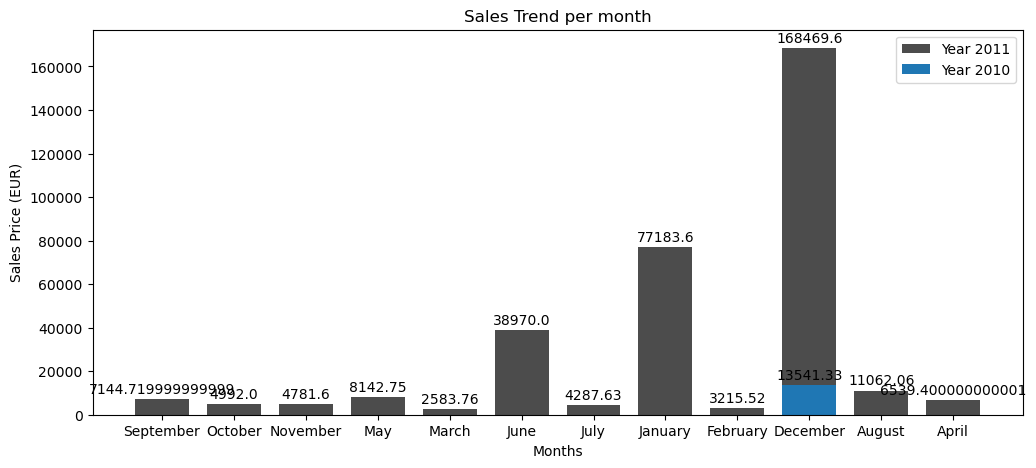

In [84]:
# bar width for the month December
bar_width = 0.75
x = range(len(sales_price11["Month"].values))

plt.figure(figsize=(12,5))
barplot1 = plt.bar(x=sales_price11["Month"], height=sales_price11["Max_Sales_Price"], width=bar_width, color="black", alpha=0.7, label="Year 2011")
barplot2 = plt.bar(x=sales_price10["Month"], height=sales_price10["Max_Sales_Price"], width=bar_width, label="Year 2010")

# add annotation
price_num = sales_price11["Max_Sales_Price"].values
for bar in barplot1:
   height = bar.get_height()
   plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 2),
   textcoords="offset points", ha='center', va='bottom')

for bar in barplot2:
   height = bar.get_height()
   plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 2),
   textcoords="offset points", ha='center', va='bottom')

# add graph description
plt.xlabel("Months")
plt.ylabel("Sales Price (EUR)")
plt.title("Sales Trend per month")
plt.legend()
plt.xticks(rotation="horizontal")
# show graph
plt.show()

!!Challenge
+ removing or modifying overlap in annotation mark on bar September and April
+ 

In [45]:
# retrieve maximum sales from this trend
max_sale_price = max_monthly_sales["Total_Price"].max()
print(f"Maximum Sale Price: {max_sale_price} EUR")

Maximum Sale Price: 168469.6 EUR


Throughout the years 2010 and 2011, a fluctuation of sales price has been occuring monthly deriving from the Sales Trend per month. Remarkably, the sale price has expediently increased with an exact amount of 168469.6 EUR, approximately 17000 EUR. This shows 